#### Immports, Read and defined database

In [352]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [353]:
df = pd.read_csv("survey_results_public.csv")


In [354]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary" }, axis=1) 
df.head(5)
df.shape

(64461, 5)

### Prep data 

In [355]:
#remove null salary 
df = df[df["Salary"].notnull()]
df.head(5)


,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


#Drop all NaN - this is a brute force way of doing it 
df =df.dropna()
df.isnull().sum()

df.head(5)


In [357]:
df.shape

(34756, 5)

#### Sort columns 
#### 1. Employment 

In [358]:
# Only interested in fulltime employment so this is removing all non full time employees from the database 
df1 = df[df["Employment"] == "Employment full-time"]
df1 = df.drop("Employment", axis=1)

# Printing the resulting DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Salary        34756 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [329]:
df1.shape
df1.head(10)

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0
13,United States,"Associate degree (A.A., A.S., etc.)",1,66000.0
15,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,108576.0
16,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,79000.0
17,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,1260000.0
18,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,83400.0


#### 2. Countries 
As can be seen below there are many countries with only one or two inputs. In order to sort data we will group all the countries with a count of 400 to "Other "

In [359]:

df1["Country"].value_counts()

Country
United States        8152
India                2668
United Kingdom       2588
Germany              2311
Canada               1345
                     ... 
Lesotho                 1
Brunei Darussalam       1
Burkina Faso            1
Malawi                  1
Yemen                   1
Name: count, Length: 159, dtype: int64

In [360]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [361]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                 10402
United States          8152
India                  2668
United Kingdom         2588
Germany                2311
Canada                 1345
Brazil                 1157
France                 1127
Netherlands             810
Poland                  798
Australia               772
Spain                   761
Italy                   665
Russian Federation      618
Sweden                  582
Name: count, dtype: int64

#### Plot
The salary is plotted againt countries.

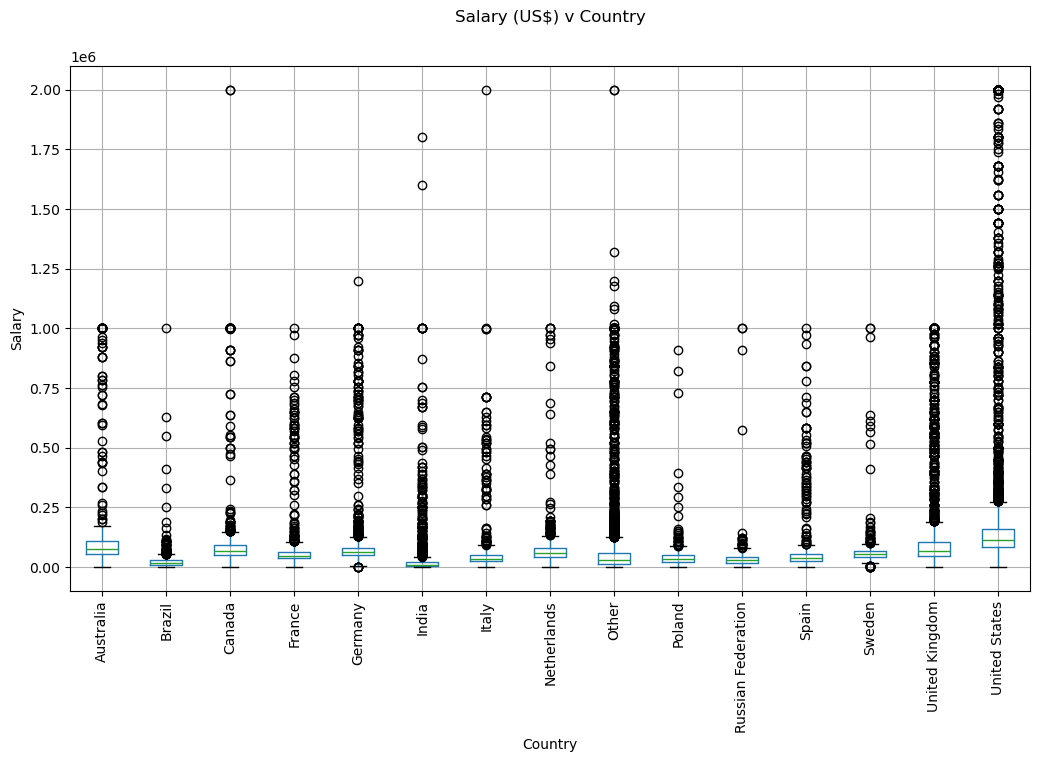

In [362]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country' , ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

#plot the salary againts the countries 


IN the plot above there are many outlies that are skewing the data. In order too fix this a range is set and Countries grouped into Other are discarded. 

In [363]:
#Keep values in a certain range in order and also drop other 
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

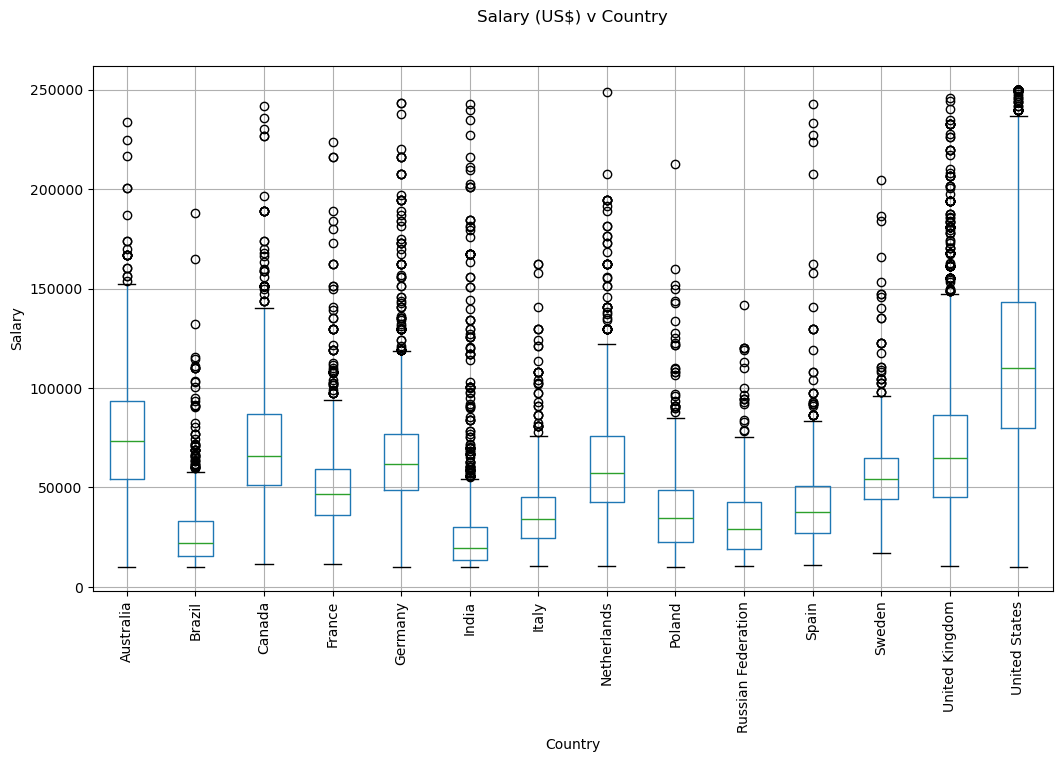

In [364]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country' , ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


Here we can see after removing Others and creating a range the box plot looks more.. 

### Clean Data for ML 

#### YearsCodePro 
This column which denotes the number of years of coding is mostly numerical data appart from two inputs of More than 50 years and Less than 1 year. This is "cleaned" by retunring 50 and 05 respectively. 

In [365]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '23', '3', '10', '12', '29', '6',
       '28', '8', '15', '11', '25', '9', 'Less than 1 year', '5', '21',
       '16', '35', '18', '14', '24', '32', '19', '22', '38', '30', '26',
       nan, '27', '17', 'More than 50 years', '40', '34', '33', '36',
       '39', '31', '37', '41', '45', '42', '43', '44', '48', '50', '49',
       '46'], dtype=object)

In [366]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

#### Education (Ed Level)
Has many different values and they are ordered into 3 seperate categories.

In [371]:
df.head(5)

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13.0,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4.0,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7.0,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20.0,Employed full-time,38916.0


In [372]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', nan,
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [374]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

TypeError: argument of type 'float' is not iterable

These are then encoded into levels 

In [375]:
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()


array([1, 3, 8, 7, 0, 6, 4, 9, 5, 2])

In [376]:
# Then the original column is removed 
df = df.drop("EdLevel", axis=1) 

#### Country is also encoded and removed from data frame:

In [381]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df['Country'])
df["Country"].unique()
df = df.drop("Country", axis=1) 

In [382]:
# Employment is removed as it is not needed in the data frame after we used it to find only the full time emplyees 
df= df.drop("Employment", axis=1) 
df.head(5)

KeyError: "['Employment'] not found in axis"

#### Split into target(y, X)

In [383]:
X = df.drop("Salary", axis =1)
y = df["Salary"]


In [384]:
#first fit the data 
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

103    YearsCodePro    Less than 1 year
226    YearsCodePro    Less than 1 year
300    YearsCodePro    Less than 1 year
350    YearsCodePro    Less than 1 year
451    YearsCodePro    Less than 1 year
                             ...       
62167  YearsCodePro    Less than 1 year
63332  YearsCodePro    Less than 1 year
63423  YearsCodePro    Less than 1 year
63759  YearsCodePro    Less than 1 year
63827  YearsCodePro    Less than 1 year
Length: 686, dtype: object